In [1]:
import pandas as pd
from selenium import webdriver 
from bs4 import BeautifulSoup
import time

from datetime import date, timedelta, datetime
import os.path

import numpy as np

from dateutil.parser import parse

import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
Baidu_CH_Stopwords_list = ['按, 按照, 俺, 俺们, 阿', 
                      '别, 别人, 别处, 别是, 别的, 别管, 别说, 不, 不仅 ,不但, 不光, 不单, 不只, 不外乎, 不如, 不妨, 不尽, 不尽然, 不得, 不怕, 不惟, 不成, 不拘, 不料, 不是, 不比, 不然, 不特, 不独, 不管, 不至于, 不若, 不论, 不过, 不问, 比方, 比如, 比及, 比, 本身, 本着, 本地, 本人, 本, 巴巴, 巴, 并, 并且, 非彼, 彼时, 彼此, 便于, 把, 边, 鄙人, 罢了, 被, 般的',
                     '此间,此次,此时,此外,此处,此地,此,才,才能,朝,朝着,从,从此,从而,除非,除此之外,除开,除外,除了,除,诚然,诚如,出来,出于,曾,趁着,趁,处在,乘,冲',
                     '等等,等到,等,第,当着,当然,当地,当,多,多么,多少,对,对于,对待,对方,对比,得,得了,打,打从,的,的确,的话,但,但凡,但是,大家,大,地,待,都,到,叮咚',
                     '而言,而是,而已,而外,而后,而况,而且,而,尔尔,尔后,尔,二来',
                     '非独,非特,非徒,非但,否则,反过来说,反过来,反而,反之,分别,凡是,凡',
                     '个,个别,固然,故,故此,故而,果然,果真,各,各个,各位,各种,各自,关于具体地说,归齐,归,根据,管,赶,跟,过,该,给,光是',
                     '或者,或曰,或是,或则,或,何,何以,何况,何处,何时,还要,还有,还是,还,后者,很,换言之,换句话说,好,后,和',
                     '即,即令,即使,即便,即如,即或,即若,继而,继后,继之,既然,既是,既往,既,尽管如此,尽管,尽,就要,就算,就是说,就是了,就是,就,据,据此,接着,经,经过,结果,及,及其,及至,加以,加之,例如,介于,几时,几,截至,极了,简言之,竟而,紧接着,距,较之,较,进而,鉴于,基于,具体说来,兼之,借傥然,今,叫,将',
                     '可,可以,可是,可见,开始,开外,况且,靠,看',
                     '来说,来自,来着,来,两者,临,类如,论,赖以,连,连同,离',
                     '莫若,莫如,莫不然,假使,假如,假若,某,某个,某些,某某,漫说,没奈何,每当,每,慢说,冒',
                     '哪个,哪些,哪儿,哪天,哪年,哪怕,哪样,哪边,哪里,那里,那边,那般,那样,那时,那儿,那会儿,那些,那么样,那么些,那么,那个,那,乃,乃至,乃至于,宁肯,宁愿,宁可,宁,能,能否,你,你们,您,拿,难道说,内,哪',
                     '凭借,凭,旁人,譬如, 譬喻',
                     '且,且不说,且说,其,其一,其中,其二,其他,其余,其它,其次,前后,前此,前者,起见,起,全部,全体,恰恰相反,岂但,却,去',
                     '若非,若果,若是,若夫,若,另,另一方面,另外,另悉,如若,如此,如果,如是,如同,如其,如何,如下,如上所述,如上,如,然则,然后,然而,任,任何,任凭,仍,仍旧,人家,人们,人,让',
                     '甚至于,甚至,甚而,甚或,甚么,甚且,什么,什么样,上,上下,虽说,虽然,虽则,虽,孰知,孰料,始而,所,所以,所在,所幸,所有,是,是以,是的,设使,设或,设若,谁,谁人,谁料,谁知,随着,随时,随后,随,顺着,顺,受到,使得,使,似的,尚且,庶几,庶乎,时候,省得,说来,首先',
                     '倘,倘使,倘或,倘然,倘若,同,同时,他,他人,他们们,她们,她,它们,它,替代,替,通过,腾', 
                     '这里,这边,这般,这次,这样,这时,这就是说,这儿,这会儿,这些,这么点儿,这么样,这么些,这么,这个,这一来,这,正是,正巧,正如,正值',
                     '万一,为,为了,为什么,为何,为止,为此,为着,无论,无宁,无,我们,我,往,望,惟其,唯有',
                     '下,向着,向使,向,先不先,相对而言,许多,像,小,些',
                     '一,一些,一何,一切,一则,一方面,一旦,一来,一样,一般,一转眼,,由此可见,由此,由是,由于,由,用来,因而,因着,因此,因了,因为,因,要是,要么,要不然,要不是,要不,要,与,与其,与其说,与否,与此同时,以,以上,以为,以便,以免,以及,以故,以期,以来,以至,以至于,以致,己,已,已矣,有,有些,有关,有及,有时,有的,沿,沿着,于,于是,于是乎,云云,云尔,依照,依据,依,余外,也罢,也好,也,又及,又,抑或,犹自,犹且,用,越是',
                     '只当,只怕,只是,只有,只消,只要,只限,再,再其次,再则,再有,再者,再者说,再说,自身,自打,自己,自家,自后,自各儿,自从,自个儿,自,怎样,怎奈,怎么样,怎么办,怎么,怎,至若,至今,至于,至,纵然,纵使,纵令,纵,之,之一,之所以,之类,着呢,着,眨眼,总而言之,总的说来,总的来说,总的来看,总之,在于,在下,在,诸,诸位,诸如,咱们,咱,作为,只,最,照着,照,直到,综上所述,贼死,逐步,遵照,遵循,针对,致,者,则甚,则',
                     '咳,哇,哈,哈哈,哉,哎,哎呀,哎哟,哗,哟,哦,哩,矣哉,矣乎,矣,焉,毋宁,欤,嘿嘿,嘿,嘻,嘛,嘘,嘎登,嘎,嗳,嗯,嗬,嗡嗡,嗡,喽,喔唷,喏,喂,啷当,啪达,啦,啥,啐,啊,唉,哼唷,哼,咧,咦,咚,咋,呼哧,呸,呵呵,呵,呢,呜呼,呜,呗,呕,呃,呀,吱,吧哒,吧,吗,吓,兮,儿,亦,了,乎']

In [4]:
# ，。“ ” 、一 》《 ：；)(
#[u'\uff0c', u'\u3002', u'\u201c' u'\u201d', u'\u3001', u'\u4e00']

Chinese_Symbols = [u'\uff0c', u'\u3002', u'\u201c' u'\u201d', u'\u3001', u'\u300b', u'\u300a', u'\uff1a', u'\uff1b',
                  u')', u'(', u'\uff09', u'\uff08']


In [5]:
combined_str = ''.decode('utf-8')
for words in Baidu_CH_Stopwords_list:
    combined_str = combined_str + words.decode('utf-8') 

In [6]:
Baidu_CH_Stopwords = combined_str.split(',')

In [7]:
def get_columns():
    return ('dt', 'source', 'domain', 'url', 'title', 'summary', 'image', 'brief', 'body', 'raw_page', 'from') 
def get_empty_columns():
    return ('', '', '', '', '', '', '', '', '', '', '') 
def get_empty_columns1():
    return ('', '', '', '', '', '', '', '', '', '', '','') 

In [37]:
files = ['./data/news/baidu-huizhou-news.csv', 
         './data/news/google-huizhou-news.csv', 
         './data/news/sina-huizhou-news.csv',
         './data/news/zhongxin-huizhou-news.csv']

In [38]:
idx = 0
new_df = pd.DataFrame(columns = get_columns())
tot = 0

In [39]:
articles = u''

In [40]:
def set_news_brief(df, i):    
    t0 = df.loc[i]['brief'].decode('utf-8')
    return t0

In [41]:
for i in range(0, len(files)):

    if os.path.isfile(files[i]): 
        df = pd.read_csv(files[i])
        tot += len(df)

        for k in range(0, len(df)):
            t0 = df.loc[k]['title']
            if len(new_df) > 0:
                res = abs(sum(new_df['title'].str.find(t0))) 
                #print 'res =====', res, len(new_df)
            else:
                res = 0
            
            #print 'compared ----', res 
            if len(new_df) == 0 or res == len(new_df):
                new_df.loc[idx] = get_empty_columns()
                new_df.loc[idx]['url'] = df.loc[k]['url']
                new_df.loc[idx]['brief'] = df.loc[k]['brief']
                new_df.loc[idx]['title'] = df.loc[k]['title']
                new_df.loc[idx]['dt'] = df.loc[k]['dt']
                new_df.loc[idx]['source'] = df.loc[k]['source']
                new_df.loc[idx]['raw_page'] = df.loc[k]['raw_page']
                idx += 1
                
                articles += set_news_brief(df, k)                
            #else:
                #print "---------found duplicates ------", res
                

In [16]:
print df.loc[k]

dt                                                 2016-11-09
source                                                   新浪旅游
domain                                                    NaN
url         http://travel.sina.com.cn/domestic/news/2016-1...
title                                                     NaN
summary                                                   NaN
image                                                     NaN
brief       相得益彰。绩溪人在徽文化的温柔哺育下成长，“十户之村，不废诵读”更是绩溪人崇尚教育追求知识的...
body                                                      NaN
raw_page                                                  NaN
from                                                      NaN
Name: 17, dtype: object


In [42]:
print len(articles)

174644


In [219]:
print idx

In [220]:
#print articles

In [221]:
#print len(new_df), tot

In [222]:
#df.head(1000)

In [223]:
#print len(new_df)

In [43]:
from nltk.tokenize.stanford_segmenter import StanfordSegmenter
from collections import Counter

In [44]:
stanford_root_dir = '/Users/nhu2000/desktop/nltk/stanford-segmenter-2014-08-27/'

In [45]:
segmenter = StanfordSegmenter(path_to_jar= stanford_root_dir + 'stanford-segmenter-3.4.1.jar', 
                              path_to_slf4j= stanford_root_dir + 'slf4j-api.jar',
                              path_to_sihan_corpora_dict= stanford_root_dir + 'data', 
                              path_to_model= stanford_root_dir + 'data/pku.gz', 
                              path_to_dict= stanford_root_dir + 'data/dict-chris6.ser.gz')

In [227]:
#str=u"我在博客园开了一个博客，我的博客名叫伏草惟存，写了一些自然语言处理的文章。"
#str = new_df.loc[0]['brief'].decode('utf-8')
#str = new_df.loc[0]['raw_page'].decode('utf-8')

In [228]:
new_df.head(300)

,dt,source,domain,url,title,summary,image,brief,body,raw_page,from
0,2016-11-28,中安在线,,http://cul.anhuinews.com/system/2016/11/28/007...,洪建华夫妇的竹刻人生,,,谁能想到，洪建华夫妇这对一无学历、二无家传、三无师承的“三无大师”成了省级非物质文化遗产·...,,"<!DOCTYPE html>\n<html xmlns=""http://www.w3.or...",
1,2016-11-21,中安在线,,http://cul.anhuinews.com/system/2016/11/21/007...,徽州民歌传人操明花校园授艺,,,近日，省非物质文化遗产徽州民歌传承人操明花前往休宁县海阳二小、歙县城关小学和徽州区岩寺镇中...,,"<!DOCTYPE html>\n<html xmlns=""http://www.w3.or...",
2,2016-11-03,中安在线,,http://cul.anhuinews.com/system/2016/11/03/007...,黄山楹联漫谈,,,黄山楹联第一人当推明朝诗人余绍祉。他遍历祖国名山大川，见到无数奇峰怪石，却感到抵不上黄山峰...,,"<!DOCTYPE html>\n<html xmlns=""http://www.w3.or...",
3,2016-01-26,中安在线,,http://cul.anhuinews.com/system/2016/01/26/007...,徽派雕刻——徽州木雕艺术,,,徽州民居、家具木板和圆木雕刻艺术的简称。木雕在旧属徽州各县分布之广在全国屈指可数，宅院内的...,,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",
4,2016-01-26,中安在线,,http://cul.anhuinews.com/system/2016/01/26/007...,徽派雕刻——徽州砖雕艺术,,,徽州砖雕徽州砖雕的造型，来源于汉画象砖。汉画象砖大都是模印砖坯刻画后入密烧制，嵌窃时再进行...,,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",
5,2016-01-26,中安在线,,http://cul.anhuinews.com/system/2016/01/26/007...,徽派雕刻——徽州石雕艺术,,,传统徽州四雕之一。在徽州城乡布很广，类别亦多，主要用于寺宅的廊柱、门墙、牌坊、墓葬等处的装...,,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",
6,2016-01-26,中安在线,,http://cul.anhuinews.com/system/2016/01/26/007...,徽州古民居雕刻装饰研究,,,徽州因明清两朝的繁盛而在历史上留下浓墨重彩的一笔，建筑就是那个时代的重要表现之一。当时的徽...,,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",
7,2016-01-26,中安在线,,http://cul.anhuinews.com/system/2016/01/26/007...,徽派雕刻——忆千年沧桑，探秘西递牌楼,,,西递位于安徽省黄山市黟县城东8公里处，因地处古徽州府之西，曾设驿站铺递所而得名。作为唐李后...,,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",
8,2014-07-16,中安在线,,http://cul.anhuinews.com/system/2014/07/16/006...,谭笔戏墨,,,文房四宝之一的毛笔品类中，宣笔自然是大名鼎鼎。可你知道吗，安徽还有一个地方的毛笔丝毫不亚于...,,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",
9,2014-07-16,中安在线,,http://cul.anhuinews.com/system/2014/07/16/006...,飞虹横卧庐州城（二）,,,第一座洋灰桥\n古老的庐州在有城墙的年代，七座城门前的桥梁有两座是吊桥，其中，威武门前的最...,,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",


str = set_content_body_anhui_news(new_df, 0)
str1 = set_content_body_hzwh(new_df, 300)
str2 = set_content_body_xin_hs(new_df, 990)

print str+str1+str2

print str

In [46]:
result = segmenter.segment(articles)

In [230]:
#print result

In [47]:
print len(result)

270726


In [48]:
res = result.split(' ')

print res[4]

In [49]:
Chinese_Symbols = [u'\uff0c', u'\u3002', u'\u201c' u'\u201d', u'\u3001', u'\u300b', u'\u300a', u'\uff1a', u'\uff1b',
                  u')', u'(', u'\uff09', u'\uff08']


In [57]:
def is_not_chinese_symbol(token):
    if token == u'\u201c' or token == u'\u201d':
        return False
    elif token == u'\uff0c' or token == u'\u3002':
        return False
    elif token == u'\u3001' or token == u'\u300b':
        return False
    elif token == u'\u300a' or token == u'\uff1a':
        return False
    elif token == u'\uff1b' or token == u'\uff09':
        return False
    elif token == u')' or token == u'(':
        return False
    elif token == u'\uff08' or token == u'\u4e00':
        return False
    elif token == u'\u548c' or token == u',': 
        return False
    elif token == u'...' or token == u'-': 
        return False
    elif token == u'"': 
        return False


    return True

In [51]:
#tokens_no_stopwords = [token for token in res if token not in Baidu_CH_Stopwords and token != u'\u201c' and token != u'\u201d'] 

In [58]:
tokens_no_stopwords = [token for token in res if token not in Baidu_CH_Stopwords and is_not_chinese_symbol(token)] 

In [59]:
count = Counter(tokens_no_stopwords)

In [60]:
most_common_words = count.most_common(50)

In [61]:
print most_common_words

[(u'\u6587\u5316', 3412), (u'\u5fbd', 1904), (u'\u5b89\u5fbd', 839), (u'\u5fbd\u5dde', 774), (u'\u767e\u5ea6', 667), (u'\u5feb\u7167', 662), (u'\u4e2d\u56fd', 519), (u'\u9ec4\u5c71', 461), (u'\u65c5\u6e38', 447), (u'\u5c06', 336), (u'\u65b0\u95fb', 334), (u'\u6761', 313), (u'\u53e4', 300), (u'\u4e2d', 297), (u'\u76f8\u540c', 292), (u'\u5b89\u5fbd\u7701', 273), (u'\u53d1\u5c55', 271), (u'\u5386\u53f2', 251), (u'\u9ec4\u5c71\u5e02', 250), (u'\u7279\u8272', 225), (u'\u5408\u80a5', 224), (u'\u8bb0\u8005', 205), (u'\u535a\u7269\u9986', 198), (u'\u6d3b\u52a8', 197), (u'\u5fbd\u5546', 193), (u'\u5fbd\u6d3e', 190), (u'\u4fdd\u62a4', 185), (u'\u4e2a', 178), (u'\u4ea7\u4e1a', 168), (u'\u4f53\u9a8c', 167), (u'\u5efa\u7b51', 166), (u'\u8ba9', 163), (u'\u827a\u672f', 162), (u'\u65b0', 159), (u'\u4f20\u7edf', 158), (u'\u4e0d', 155), (u'\u4f20\u627f', 154), (u'\u5c55\u793a', 152), (u'\u5e74', 152), (u'\u5efa\u8bbe', 151), (u'\u66f4', 145), (u'\u56fd\u9645', 143), (u'\u4e2d\u5fc3', 141), (u'\u4e09', 1

In [62]:
for word in most_common_words:
    print word[0], word[1]

文化 3412
徽 1904
安徽 839
徽州 774
百度 667
快照 662
中国 519
黄山 461
旅游 447
将 336
新闻 334
条 313
古 300
中 297
相同 292
安徽省 273
发展 271
历史 251
黄山市 250
特色 225
合肥 224
记者 205
博物馆 198
活动 197
徽商 193
徽派 190
保护 185
个 178
产业 168
体验 167
建筑 166
让 163
艺术 162
新 159
传统 158
不 155
传承 154
展示 152
年 152
建设 151
更 145
国际 143
中心 141
三 141
: 139
重要 138
主题 136
资源 134
项目 131
歙县 130


In [241]:
words, counts = zip(*most_common_words)

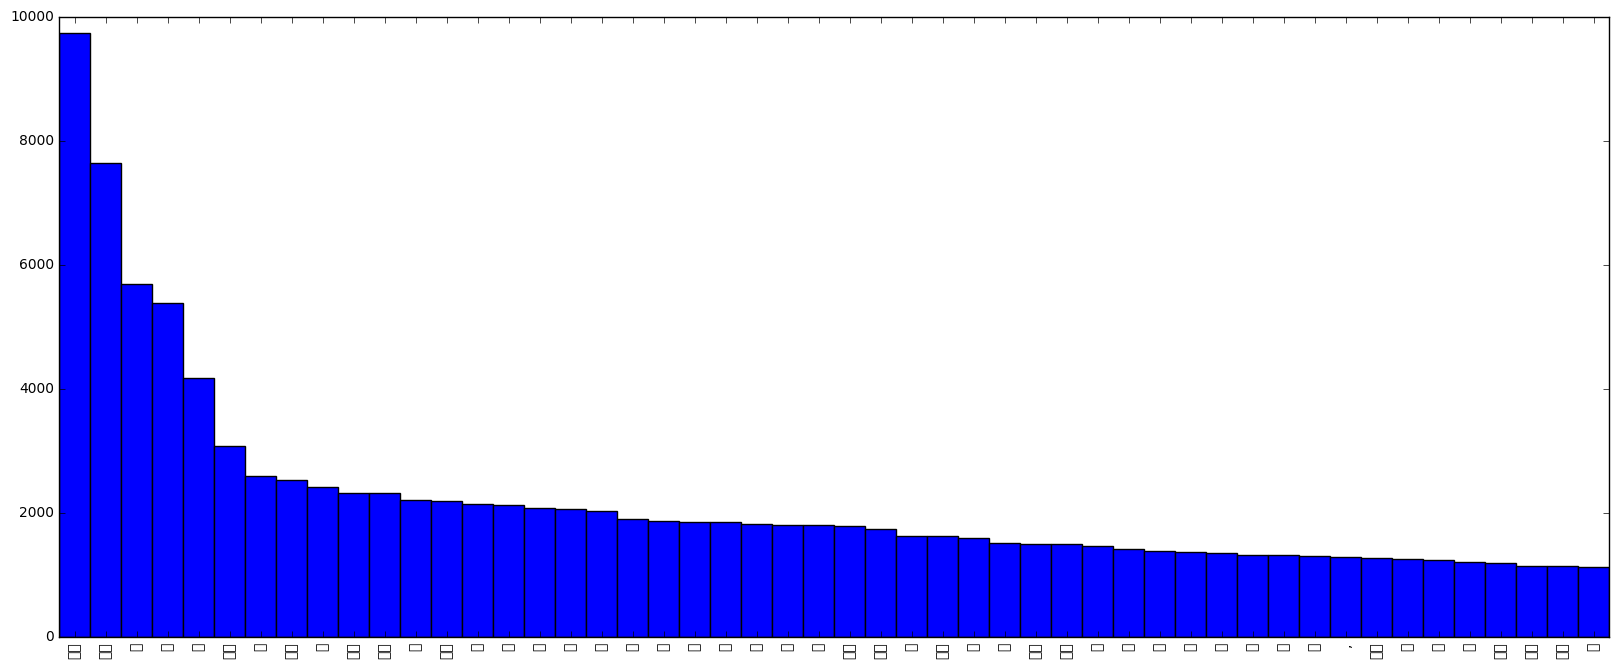

In [242]:
pos = np.arange(len(words))
width = 1.0     # gives histogram aspect to the bar diagram

plt.figure(figsize=(20,8))

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(words, rotation=90)

plt.bar(pos, counts, width, color='b')
plt.show()